In [1]:
import pandas as pd
from pathlib import Path
from maize.core.workflow import Workflow
from maize.steps.io import LoadData, LogResult, Return
 
from maize.steps.mai.docking.adv import Vina
from maize.steps.mai.molecule import Gypsum
from maize.utilities.chem import IsomerCollection
import os, sys
os.environ['XDG_CONFIG_HOME'] = '/home/iwatobipen/dev/CBI/cheminfo_tutorial_20241028/data/'
flow = Workflow(name='dock', level='info', cleanup_temp=False)

In [2]:
flow.config.update(Path("../data/maize.toml"))

load = flow.add(LoadData[list[str]])
#void = flow.add(Void)
# 3D conf gen and protonate
embe = flow.add(Gypsum)
# run vina docking
dock = flow.add(Vina)
# receive docke results
retu = flow.add(Return[list[IsomerCollection]])

In [4]:
df = pd.read_csv('./TL_sampling.csv')
print(df.shape)
df.head(2)
df=df[df.NLL<5]
print(df.shape)
df.head(7)

(104, 2)
(56, 2)


,SMILES,NLL
2,CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1,4.73
3,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)C=CCN1...,4.62
4,Cc1cccc(-c2nn3c(c2-c2ccnc4ccc(C(N)=O)cc24)CCC3)n1,4.75
7,CN1CCN(c2ccc3nc(-c4cccc5c4OCO5)c(-c4ccncc4)n3c...,4.72
8,Cc1cc2c(F)c(Oc3ncnn4cc(OCC(C)OC(=O)C(C)N)c(C)c...,4.90
9,CN1CCN(c2ccc3nc(-c4cccc5c4OCO5)c(-c4ccccc4)n3n...,4.70
10,Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(C...,4.56


In [5]:
smiles_lst = [row['SMILES'] for idx, row in df.iterrows()]
# used first 30 ligands
smiles_lst = [s for s in smiles_lst][:30]

In [6]:
from rdkit import Chem
from rdkit.Chem import Draw

In [7]:
mols = [Chem.MolFromSmiles(smi) for smi in smiles_lst]

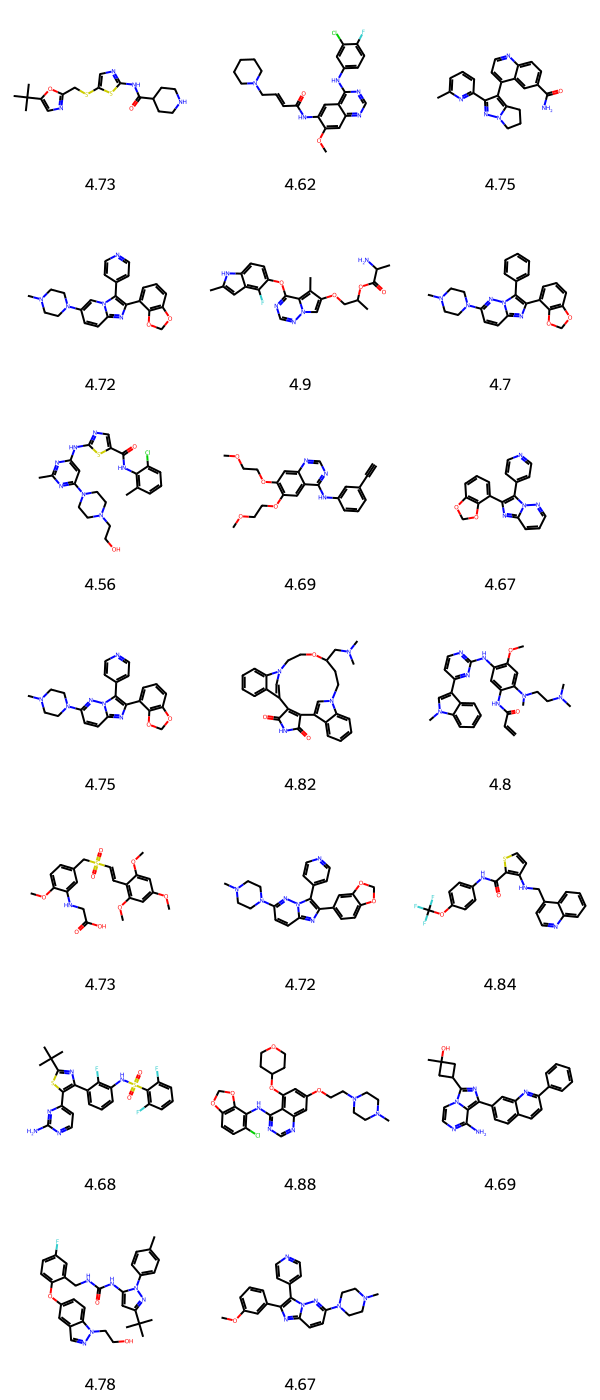

In [8]:
Draw.MolsToGridImage(mols[:20], legends=[str(nll) for nll in df.NLL])

In [9]:
load.data.set(smiles_lst)
embe.n_variants.set(2)
# RIP3K <https://www.rcsb.org/structure/7MON>
dock.receptor.set(Path('/home/iwatobipen/dev/CBI/cheminfo_tutorial_20241028/data/7mon.pdbqt'))
dock.search_center.set((-21.087, -20.225,  -3.082))
dock.search_range.set((20.00, 20.00,20.00))


In [10]:
flow.connect(load.out, embe.inp)
flow.connect(embe.out, dock.inp)
flow.connect(dock.out,retu.inp)
flow.check()

In [11]:
flow.execute()

2024-10-08 21:22:21,065 |     INFO |             dock | 
              ___           ___                       ___           ___
             /\__\         /\  \          ___        /\  \         /\  \
            /::|  |       /::\  \        /\  \       \:\  \       /::\  \
           /:|:|  |      /:/\:\  \       \:\  \       \:\  \     /:/\:\  \
          /:/|:|__|__   /::\~\:\  \      /::\__\       \:\  \   /::\~\:\  \
         /:/ |::::\__\ /:/\:\ \:\__\  __/:/\/__/ _______\:\__\ /:/\:\ \:\__\
         \/__/~~/:/  / \/__\:\/:/  / /\/:/  /    \::::::::/__/ \:\~\:\ \/__/
               /:/  /       \::/  /  \::/__/      \:\~~\~~      \:\ \:\__\
              /:/  /        /:/  /    \:\__\       \:\  \        \:\ \/__/
             /:/  /        /:/  /      \/__/        \:\__\        \:\__\
             \/__/         \/__/                     \/__/         \/__/


2024-10-08 21:22:21,066 |     INFO |             dock | Starting Maize version 0.8.3 (c) AstraZeneca 2024
2024-10-08 21:2

2024-10-08 21:23:10,609 |     INFO |             dock | Workflow status
                                   |           return | WAITING_FOR_INPUT
                                   |           gypsum | RUNNING
                                   |             vina | WAITING_FOR_INPUT
                                   |         loaddata | COMPLETED
2024-10-08 21:23:10,601 |     INFO |           gypsum | Found failed SMILES file
2024-10-08 21:23:10,602 |     INFO |           gypsum | Failed SMILES:
'Cc1cc(Nc2cc(N3CCN(C)CC3)nc(Sc3ccc(NC(=O)C4CC4)cc3)n2)n[nH]1
C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1'
2024-10-08 21:23:10,658 |  WARNING |           gypsum | Skipping failed embedding for SMILES 'C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1', falling back to RDKit
2024-10-08 21:23:10,876 |  WARNING |           gypsum | Skipping failed embedding for SMILES 'Cc1cc(Nc2cc(N3CCN(C)CC3)nc(Sc3ccc(NC(=O)C4CC4)cc3)n2)n[nH]1', falling back to RDKit
2024-10-08 21:23:11,024 |     INFO |             vina 

2024-10-08 21:24:42,731 |     INFO |             vina | Job completed (1/57)
2024-10-08 21:24:42,860 |     INFO |             vina | Running job with PSI/J id=bda82802-341a-4bc9-9d83-dfbe6be805a7, stdout=/tmp/tmporicvxbr/job-ae7z8x-out, stderr=/tmp/tmporicvxbr/job-ae7z8x-err


2024-10-08 21:24:45,663 |     INFO |             vina | Job completed (2/57)
2024-10-08 21:24:45,680 |     INFO |             vina | Running job with PSI/J id=ffc3c95a-681a-4cfe-8d0f-fcd545e12cee, stdout=/tmp/tmpk7e51zny/job-triqlp-out, stderr=/tmp/tmpk7e51zny/job-triqlp-err


2024-10-08 21:26:21,431 |     INFO |             vina | Job completed (3/57)
2024-10-08 21:26:21,508 |     INFO |             vina | Running job with PSI/J id=acbda28d-27c5-4b38-af96-c58a4c83e968, stdout=/tmp/tmpwggws508/job-e7qhzp-out, stderr=/tmp/tmpwggws508/job-e7qhzp-err
2024-10-08 21:26:21,714 |     INFO |             vina | Job completed (4/57)
2024-10-08 21:26:21,823 |     INFO |             vina | Running job with PSI/J id=6d770233-280a-435a-8b44-c8cfdd767d6b, stdout=/tmp/tmpy2hmwurh/job-57ge4i-out, stderr=/tmp/tmpy2hmwurh/job-57ge4i-err


2024-10-08 21:26:28,834 |     INFO |             vina | Job completed (5/57)
2024-10-08 21:26:28,890 |     INFO |             vina | Running job with PSI/J id=c5b6ad03-8373-49cd-b8c8-06a63676acd5, stdout=/tmp/tmpnf350qck/job-w6gxa4-out, stderr=/tmp/tmpnf350qck/job-w6gxa4-err


2024-10-08 21:26:30,023 |     INFO |             vina | Job completed (6/57)
2024-10-08 21:26:30,118 |     INFO |             vina | Running job with PSI/J id=7b2bbdef-e165-42f3-a416-72a2aa097dbe, stdout=/tmp/tmpv_dxii_2/job-5hw1wh-out, stderr=/tmp/tmpv_dxii_2/job-5hw1wh-err


2024-10-08 21:26:34,947 |     INFO |             vina | Job completed (7/57)
2024-10-08 21:26:34,985 |     INFO |             vina | Running job with PSI/J id=486af1cb-f6f4-4998-a2fb-152288a1da93, stdout=/tmp/tmp_v9eobs9/job-guv89l-out, stderr=/tmp/tmp_v9eobs9/job-guv89l-err
2024-10-08 21:26:35,405 |     INFO |             vina | Job completed (8/57)
2024-10-08 21:26:35,503 |     INFO |             vina | Running job with PSI/J id=aa37facb-0485-45ca-9491-2708795e509c, stdout=/tmp/tmpge4alnlg/job-55gpzp-out, stderr=/tmp/tmpge4alnlg/job-55gpzp-err


2024-10-08 21:26:42,135 |     INFO |             vina | Job completed (9/57)
2024-10-08 21:26:42,157 |     INFO |             vina | Running job with PSI/J id=8500db41-3f28-4620-829f-3bd2428941fc, stdout=/tmp/tmppbm_n5n7/job-pjlojx-out, stderr=/tmp/tmppbm_n5n7/job-pjlojx-err


2024-10-08 21:26:51,929 |     INFO |             vina | Job completed (10/57)
2024-10-08 21:26:51,989 |     INFO |             vina | Running job with PSI/J id=f9b4845c-8923-4897-990f-47daa11d9f2b, stdout=/tmp/tmp7w5xnlnn/job-ym4qrm-out, stderr=/tmp/tmp7w5xnlnn/job-ym4qrm-err


2024-10-08 21:27:21,267 |     INFO |             vina | Job completed (11/57)
2024-10-08 21:27:21,278 |     INFO |             vina | Running job with PSI/J id=576d038c-a7ce-4197-855b-9633b9d8a035, stdout=/tmp/tmpvwn_00lw/job-s069dh-out, stderr=/tmp/tmpvwn_00lw/job-s069dh-err


2024-10-08 21:27:27,691 |     INFO |             vina | Job completed (12/57)
2024-10-08 21:27:27,712 |     INFO |             vina | Running job with PSI/J id=17e76a67-13ab-4e39-917c-b8a3093b5a30, stdout=/tmp/tmpabfana0h/job-j3kia6-out, stderr=/tmp/tmpabfana0h/job-j3kia6-err


2024-10-08 21:29:16,530 |     INFO |             vina | Job completed (13/57)
2024-10-08 21:29:16,633 |     INFO |             vina | Running job with PSI/J id=d77ec5ba-4546-47a9-bac2-34817f3cb3ce, stdout=/tmp/tmpmkrw3e6f/job-xdfcak-out, stderr=/tmp/tmpmkrw3e6f/job-xdfcak-err


2024-10-08 21:29:36,304 |     INFO |             vina | Job completed (14/57)
2024-10-08 21:29:36,414 |     INFO |             vina | Running job with PSI/J id=6606fd1c-ada0-443a-8412-d073a402cc44, stdout=/tmp/tmpf5wq4mgt/job-94yqtj-out, stderr=/tmp/tmpf5wq4mgt/job-94yqtj-err


2024-10-08 21:29:42,113 |     INFO |             vina | Job completed (15/57)
2024-10-08 21:29:42,147 |     INFO |             vina | Running job with PSI/J id=34ec7f74-170e-4463-aab1-e46cfc4ca7ef, stdout=/tmp/tmppxj2uyup/job-po67bf-out, stderr=/tmp/tmppxj2uyup/job-po67bf-err


2024-10-08 21:29:45,252 |     INFO |             vina | Job completed (16/57)
2024-10-08 21:29:45,277 |     INFO |             vina | Running job with PSI/J id=62b39d93-dae9-425d-a20a-f195a9e30bc6, stdout=/tmp/tmptemoiv5n/job-9htv2n-out, stderr=/tmp/tmptemoiv5n/job-9htv2n-err


2024-10-08 21:30:11,971 |     INFO |             vina | Job completed (17/57)
2024-10-08 21:30:11,994 |     INFO |             vina | Running job with PSI/J id=898d7c6c-28a4-46d2-ba86-fde7a1749f29, stdout=/tmp/tmphqjt0hvj/job-weus4k-out, stderr=/tmp/tmphqjt0hvj/job-weus4k-err


2024-10-08 21:30:41,301 |     INFO |             vina | Job completed (18/57)
2024-10-08 21:30:41,333 |     INFO |             vina | Running job with PSI/J id=b44c9d70-16f8-4be9-af21-262f77d6056c, stdout=/tmp/tmpdkri_gl1/job-ntilqg-out, stderr=/tmp/tmpdkri_gl1/job-ntilqg-err


2024-10-08 21:30:58,209 |     INFO |             vina | Job completed (19/57)
2024-10-08 21:30:58,286 |     INFO |             vina | Running job with PSI/J id=669a0389-5c88-4246-ba27-1211cdced207, stdout=/tmp/tmpzpjlfi9x/job-hazbyc-out, stderr=/tmp/tmpzpjlfi9x/job-hazbyc-err


2024-10-08 21:32:35,533 |     INFO |             vina | Job completed (20/57)
2024-10-08 21:32:35,591 |     INFO |             vina | Running job with PSI/J id=f33c222b-b626-45cf-9ccd-7cd1c9dd5f93, stdout=/tmp/tmpw2awmqm0/job-u0x75e-out, stderr=/tmp/tmpw2awmqm0/job-u0x75e-err


2024-10-08 21:32:40,259 |     INFO |             vina | Job completed (21/57)
2024-10-08 21:32:40,328 |     INFO |             vina | Running job with PSI/J id=5effc187-b068-489d-9c2b-b088b1fdf5d8, stdout=/tmp/tmphrvzpziy/job-7qsslc-out, stderr=/tmp/tmphrvzpziy/job-7qsslc-err


2024-10-08 21:32:45,133 |     INFO |             vina | Job completed (22/57)
2024-10-08 21:32:45,217 |     INFO |             vina | Running job with PSI/J id=fa3f106a-536f-4e27-bf1f-f8c7c2a64be0, stdout=/tmp/tmpa56tv4k3/job-kvcubr-out, stderr=/tmp/tmpa56tv4k3/job-kvcubr-err


2024-10-08 21:33:25,267 |     INFO |             vina | Job completed (23/57)
2024-10-08 21:33:25,384 |     INFO |             vina | Running job with PSI/J id=7a261e8b-70e3-4e1a-92c5-a3473aa7186d, stdout=/tmp/tmpgyvzrc20/job-pgpp6b-out, stderr=/tmp/tmpgyvzrc20/job-pgpp6b-err


2024-10-08 21:33:34,420 |     INFO |             dock | Workflow status
                                   |           return | WAITING_FOR_INPUT
                                   |           gypsum | COMPLETED
                                   |             vina | WAITING_FOR_COMMAND
                                   |         loaddata | COMPLETED


2024-10-08 21:33:50,326 |     INFO |             vina | Job completed (24/57)
2024-10-08 21:33:50,427 |     INFO |             vina | Running job with PSI/J id=f012cd77-3e8e-4597-89a4-6aa2e81cb082, stdout=/tmp/tmp3mxphr7v/job-k6pg2u-out, stderr=/tmp/tmp3mxphr7v/job-k6pg2u-err


2024-10-08 21:33:59,148 |     INFO |             vina | Job completed (25/57)
2024-10-08 21:33:59,158 |     INFO |             vina | Running job with PSI/J id=e20fe5d6-128a-459a-813d-0a8665f0030f, stdout=/tmp/tmp_oy3ihs8/job-35ghqa-out, stderr=/tmp/tmp_oy3ihs8/job-35ghqa-err
2024-10-08 21:34:00,391 |     INFO |             vina | Job completed (26/57)
2024-10-08 21:34:00,485 |     INFO |             vina | Running job with PSI/J id=5429475c-c7fb-4e29-ac1b-612d1cedcca1, stdout=/tmp/tmpymi6otbb/job-t7pi62-out, stderr=/tmp/tmpymi6otbb/job-t7pi62-err


2024-10-08 21:34:13,195 |     INFO |             vina | Job completed (27/57)
2024-10-08 21:34:13,235 |     INFO |             vina | Running job with PSI/J id=1aef0c25-c9d3-48c0-8b9c-cf8e4d24e094, stdout=/tmp/tmpxyngxxss/job-rcgeeg-out, stderr=/tmp/tmpxyngxxss/job-rcgeeg-err


2024-10-08 21:34:38,927 |     INFO |             vina | Job completed (28/57)
2024-10-08 21:34:38,982 |     INFO |             vina | Running job with PSI/J id=241af366-094d-4a29-99e5-d3f5aacf751b, stdout=/tmp/tmpxjnunheo/job-j4npun-out, stderr=/tmp/tmpxjnunheo/job-j4npun-err


2024-10-08 21:35:04,429 |     INFO |             vina | Job completed (29/57)
2024-10-08 21:35:04,513 |     INFO |             vina | Running job with PSI/J id=b43ec9c8-e30f-4d30-8d45-dc3fc7c98b1d, stdout=/tmp/tmp5fqd0zmq/job-iiugh9-out, stderr=/tmp/tmp5fqd0zmq/job-iiugh9-err


2024-10-08 21:35:09,509 |     INFO |             vina | Job completed (30/57)
2024-10-08 21:35:09,539 |     INFO |             vina | Running job with PSI/J id=b5b99ba0-412a-4667-a674-e74dc8890da7, stdout=/tmp/tmpzu5rpkmk/job-7568jb-out, stderr=/tmp/tmpzu5rpkmk/job-7568jb-err


2024-10-08 21:35:16,730 |     INFO |             vina | Job completed (31/57)
2024-10-08 21:35:16,767 |     INFO |             vina | Running job with PSI/J id=3a095ab5-f511-4d3a-ae99-15d3c695025c, stdout=/tmp/tmperyt8boo/job-4j2y9f-out, stderr=/tmp/tmperyt8boo/job-4j2y9f-err


2024-10-08 21:35:25,817 |     INFO |             vina | Job completed (32/57)
2024-10-08 21:35:25,930 |     INFO |             vina | Running job with PSI/J id=41eca9ff-06dc-4385-ad98-6635c555d788, stdout=/tmp/tmpzfuw_5cd/job-bihfsk-out, stderr=/tmp/tmpzfuw_5cd/job-bihfsk-err


2024-10-08 21:35:53,656 |     INFO |             vina | Job completed (33/57)
2024-10-08 21:35:53,732 |     INFO |             vina | Running job with PSI/J id=21c94aa1-ce6b-4e32-9c58-ca991a1b088f, stdout=/tmp/tmp_ci38p2g/job-11krng-out, stderr=/tmp/tmp_ci38p2g/job-11krng-err


2024-10-08 21:36:37,114 |     INFO |             vina | Job completed (34/57)
2024-10-08 21:36:37,192 |     INFO |             vina | Running job with PSI/J id=c18a07a7-87bd-4555-8d9b-ec428c158b20, stdout=/tmp/tmpvxlqlslj/job-r92fyd-out, stderr=/tmp/tmpvxlqlslj/job-r92fyd-err


2024-10-08 21:36:58,312 |     INFO |             vina | Job completed (35/57)
2024-10-08 21:36:58,379 |     INFO |             vina | Running job with PSI/J id=4fd85f2a-0585-4379-bf36-256458fc2513, stdout=/tmp/tmpcjgis9hj/job-hfy4m0-out, stderr=/tmp/tmpcjgis9hj/job-hfy4m0-err


2024-10-08 21:37:09,462 |     INFO |             vina | Job completed (36/57)
2024-10-08 21:37:09,524 |     INFO |             vina | Running job with PSI/J id=70fa10c5-1bd9-4ff9-947c-a3b8c783c6fe, stdout=/tmp/tmpseud5wy6/job-ks6x5l-out, stderr=/tmp/tmpseud5wy6/job-ks6x5l-err


2024-10-08 21:37:22,730 |     INFO |             vina | Job completed (37/57)
2024-10-08 21:37:22,829 |     INFO |             vina | Running job with PSI/J id=73bbd9a9-30cb-442b-ab99-20872bc86817, stdout=/tmp/tmpuv8n5s41/job-kfbbqj-out, stderr=/tmp/tmpuv8n5s41/job-kfbbqj-err


2024-10-08 21:37:33,885 |     INFO |             vina | Job completed (38/57)


2024-10-08 21:38:26,341 |     INFO |             vina | Job completed (39/57)


2024-10-08 21:39:02,470 |     INFO |             vina | Job completed (40/57)


2024-10-08 21:39:16,129 |     INFO |             vina | Job completed (41/57)


2024-10-08 21:39:36,687 |     INFO |             vina | Job completed (42/57)


2024-10-08 21:39:54,699 |     INFO |             vina | Job completed (43/57)


2024-10-08 21:40:01,655 |     INFO |             vina | Job completed (44/57)


2024-10-08 21:40:13,237 |     INFO |             vina | Job completed (45/57)


2024-10-08 21:40:21,706 |     INFO |             vina | Job completed (46/57)


2024-10-08 21:40:54,106 |     INFO |             vina | Job completed (47/57)


2024-10-08 21:40:57,034 |     INFO |             vina | Job completed (48/57)


2024-10-08 21:41:02,083 |     INFO |             vina | Job completed (49/57)


2024-10-08 21:41:04,960 |     INFO |             vina | Job completed (50/57)


2024-10-08 21:41:10,497 |     INFO |             vina | Job completed (51/57)
2024-10-08 21:41:11,957 |     INFO |             vina | Job completed (52/57)


2024-10-08 21:41:15,843 |     INFO |             vina | Job completed (53/57)


2024-10-08 21:41:36,536 |     INFO |             vina | Job completed (54/57)


2024-10-08 21:41:43,589 |     INFO |             vina | Job completed (55/57)


2024-10-08 21:41:49,330 |     INFO |             vina | Job completed (56/57)


2024-10-08 21:42:53,200 |     INFO |             vina | Job completed (57/57)
2024-10-08 21:42:53,292 |     INFO |             dock | Workflow status
                                   |           return | WAITING_FOR_INPUT
                                   |           gypsum | COMPLETED
                                   |             vina | RUNNING
                                   |         loaddata | COMPLETED
2024-10-08 21:42:53,351 |     INFO |             vina | Parsing isomer 0: 'OUSFTKFNBAZUKL-UYBDAZJANA-N'
2024-10-08 21:42:53,371 |     INFO |             vina | Parsing isomer 1: 'LVXJQMNHJWSHET-VOUKUTLYNA-O'
2024-10-08 21:42:53,381 |     INFO |             vina | Parsing isomer 2: 'IVRXNBXKWIJUQB-GARVAYOTNA-M'
2024-10-08 21:42:53,388 |     INFO |             vina | Parsing isomer 3: 'WFAGOLWNQFGARG-TUHHMXPJNA-O'
2024-10-08 21:42:53,396 |     INFO |             vina | Parsing isomer 4: 'WFAGOLWNQFGARG-ANBOTNQONA-O'
2024-10-08 21:42:53,404 |     INFO |             vina | Pars

In [12]:
!cat mkdir dock_res

cat: mkdir: No such file or directory
cat: dock_res: No such file or directory


In [13]:
res=retu.get()
import numpy as np
from pathlib import Path
for idx, m in enumerate(res):
    if type(m.scores['])==np.float64:
        m.to_sdf(Path(f'ok_{idx}.sdf'))
    else:
        # docking failed compounds don't have score.
        m.to_sdf(Path(f'./mkdir dock_res/ng_{idx}.sdf'))

AttributeError: 'IsomerCollection' object has no attribute 'best_score'

In [14]:
m.scores

{'free_energy': -6.546}